<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_25_visualising_cnn/Lecture_25_visualising_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Definition and Summary

In [11]:
# Import the VGG16 model and Model class from the Keras applications module.
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [2]:
# Instantiate the VGG16 model with default weights (trained on ImageNet).
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [3]:
# Print a summary of the model's architecture, including layer names, output shapes, and parameter counts.
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

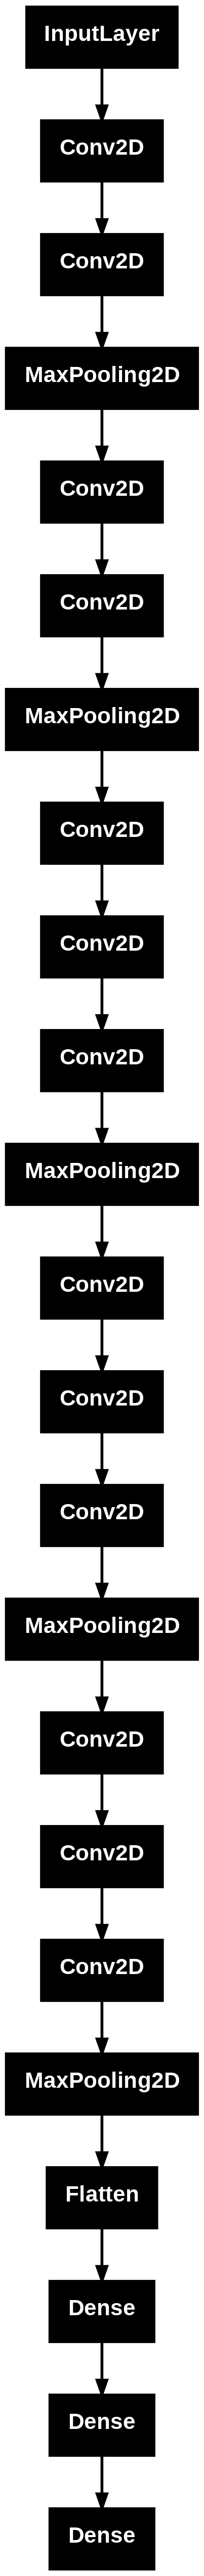

In [4]:
# Import the plot_model utility from Keras.
from keras.utils import plot_model

# Generate a plot of the model's architecture and save it as a file.
# This function requires pydot and graphviz to be installed.
plot_model(model)

# Exploring Convolutional Layer Weights

In [5]:
# Iterate through each layer in the model.
for i in range(len(model.layers)):
  # Check if the layer's name contains 'conv', indicating it's a convolutional layer.
  if 'conv' not in model.layers[i].name:
    continue

  # Get the weights (filters and biases) for the convolutional layer.
  filters, biases = model.layers[i].get_weights()
  # Print the layer number, name, and the shape of its filters.
  print('layer number', i, model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [6]:
# Get the weights (filters and biases) for the second layer (index 1) of the model.
# In VGG16, this is the first convolutional layer (block1_conv1).
filters, bias = model.layers[1].get_weights()

In [7]:
# Find the minimum and maximum values in the filters array.
f_min, f_max = filters.min(), filters.max()
# Normalize the filter values to the range [0, 1] for visualization.
filters = (filters - f_min) / (f_max - f_min)

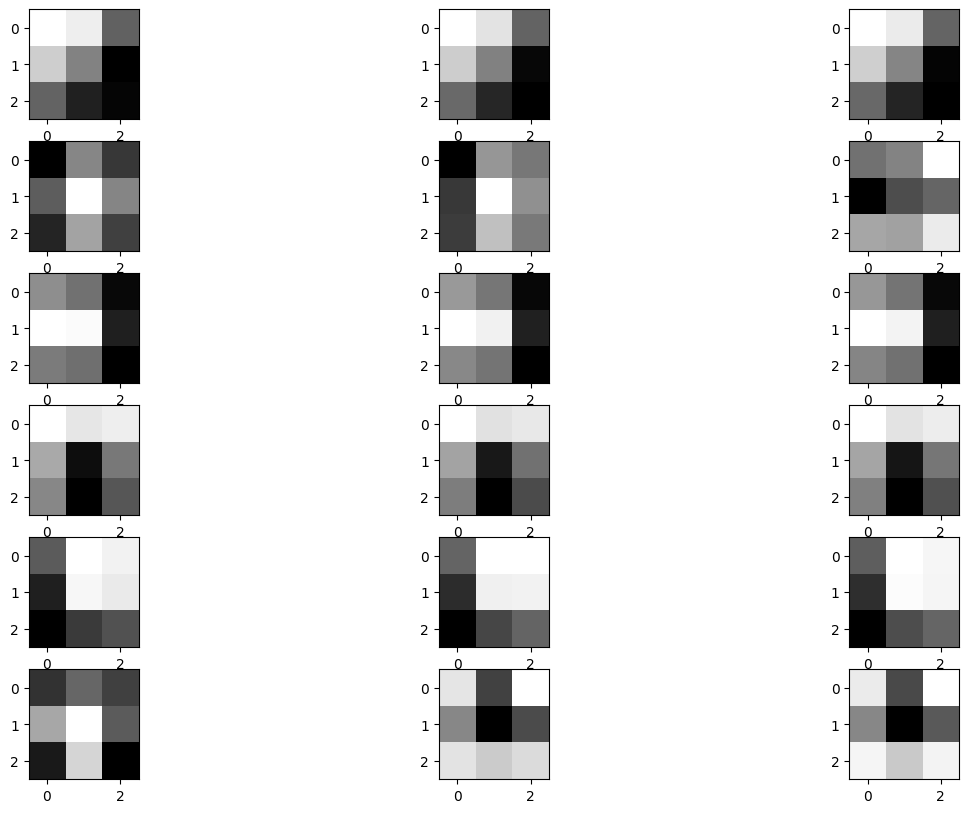

In [8]:
# Import the pyplot module from matplotlib for plotting.
from matplotlib import pyplot

# Define the number of filters to visualize from the first convolutional layer.
n_filters = 6
# Initialize a counter for subplot placement.
ix = 1
# Create a figure with a specified size to display the filter visualizations.
fig = pyplot.figure(figsize=(15, 10))
# Loop through the first n_filters of the first convolutional layer.
for i in range(n_filters):
  # Extract the i-th filter.
  f = filters[:, :, :, i]
  # Loop through each of the 3 channels (e.g., R, G, B) of the filter.
  for j in range(3):
    # Create a subplot within the figure.
    pyplot.subplot(n_filters, 3, ix)
    # Display the j-th channel of the current filter as a grayscale image.
    pyplot.imshow(f[:, :, j], cmap='gray')
    # Increment the subplot counter.
    ix += 1
# Display the figure with all the filter visualizations.
pyplot.show()

# Feature Extraction and Visualization

In [12]:
# Create a new model that outputs the features from the first convolutional layer (layer with index 1).
model = Model(inputs = model.inputs, outputs = model.layers[1].output)

In [15]:
# Import the load_img function from keras.utils to load an image.
from keras.utils import load_img

In [16]:
# Load an image from the specified path and resize it to 224x224 pixels.
image = load_img('/content/Dog_Breeds.jpg', target_size=(224, 224))

In [19]:
# Import necessary functions for image processing:
# - img_to_array: Converts an image to a NumPy array.
# - expand_dims: Adds a dimension to the array.
# - preprocess_input: Preprocesses the image data according to the VGG16 model's requirements.
from keras.utils import img_to_array
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

In [20]:
# Convert the loaded image to a NumPy array.
image = img_to_array(image)

# Add a batch dimension to the image array (required by the model).
image = expand_dims(image, axis= 0)

# Preprocess the image data for the VGG16 model.
image = preprocess_input(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


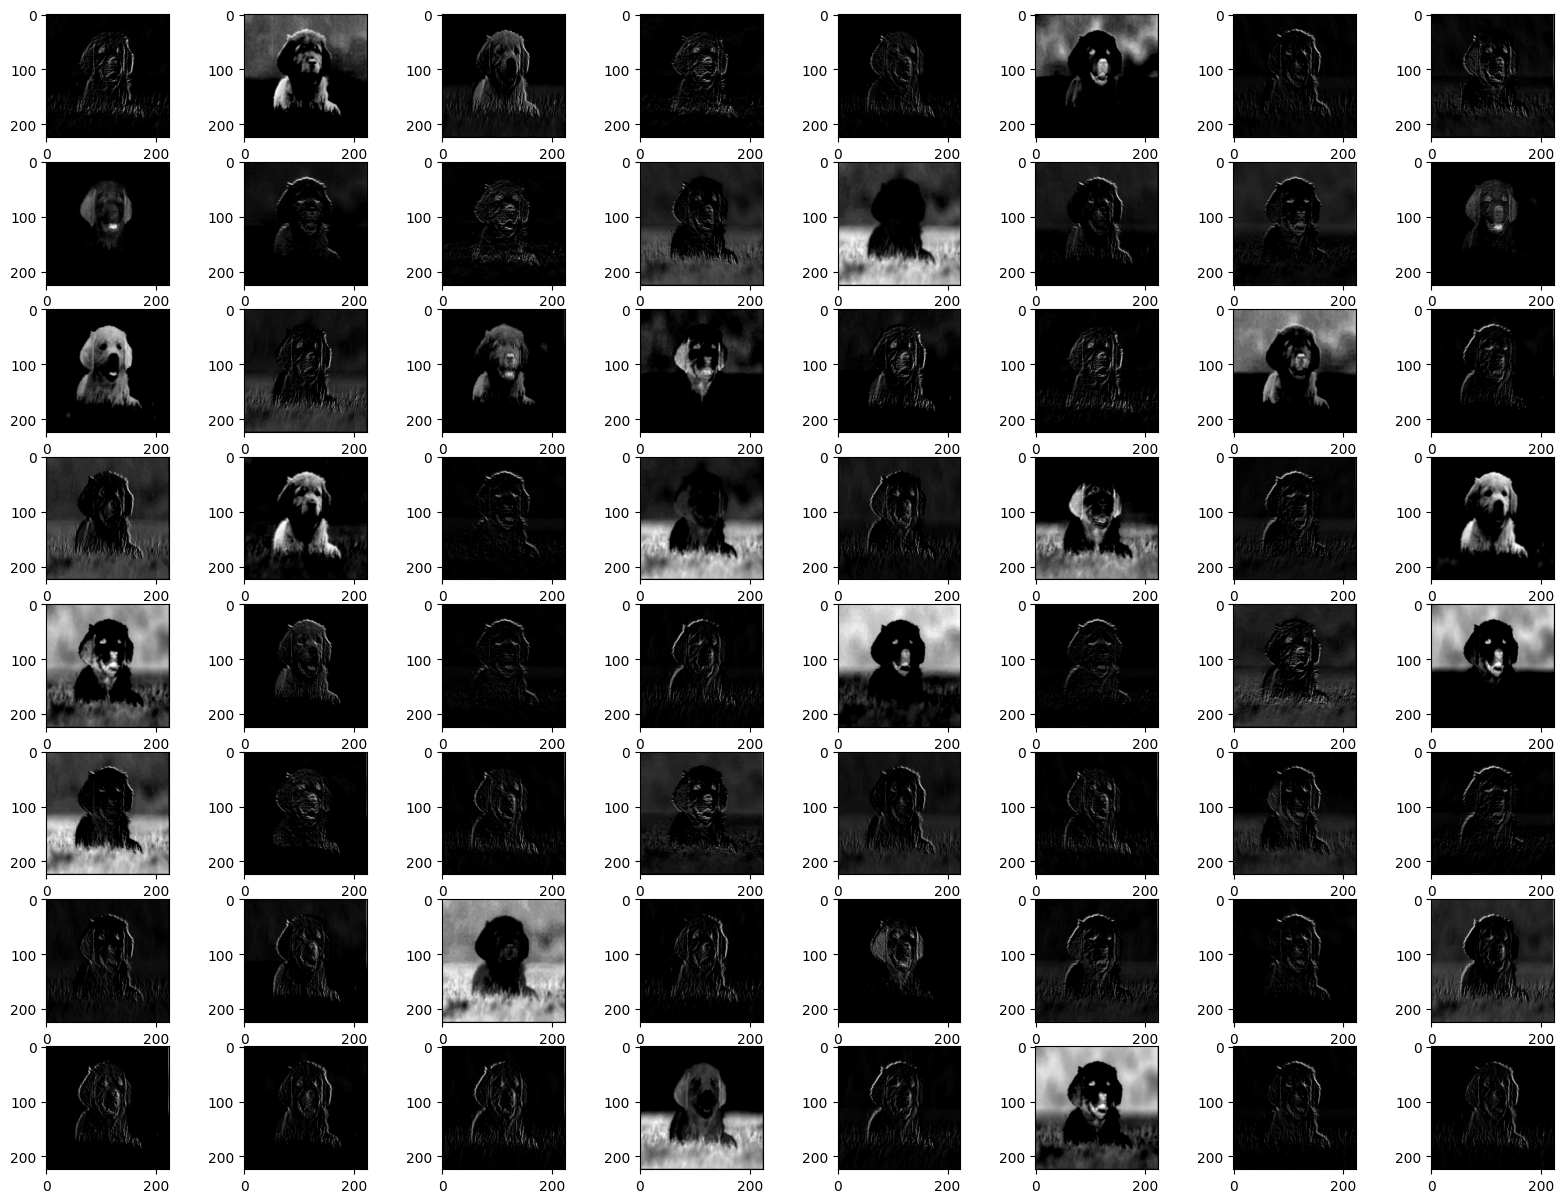

In [21]:
# Get the output features of the first convolutional layer for the input image.
features = model.predict(image)

# Create a figure to display the feature maps.
fig = pyplot.figure(figsize=(20, 15))

# Loop through each feature map (channel) in the output.
for i in range(1, features.shape[3]+1):
  # Create a subplot for each feature map.
  pyplot.subplot(8, 8, i)
  # Display the i-th feature map as a grayscale image.
  pyplot.imshow(features[0, :, :, i-1], cmap='gray')

# Display the figure with all the feature maps.
pyplot.show()